In [10]:
import numpy as np
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [4]:
def func_sample(x, y):
    return x**2/20 + y**2

In [8]:
x = y = np.arange(-10, 11, 1)

In [12]:
X, Y = np.meshgrid(x, y)
Z = func_sample(X,Y)

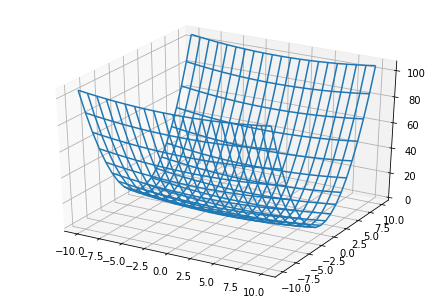

In [13]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X, Y, Z)
plt.show()

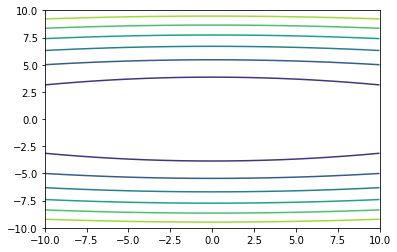

In [16]:
cont = plt.contour(X, Y, Z)
plt.show()

In [19]:
from preferences.two_layer_net import TwoLayerNet
from preferences.common.optimizer import SGD

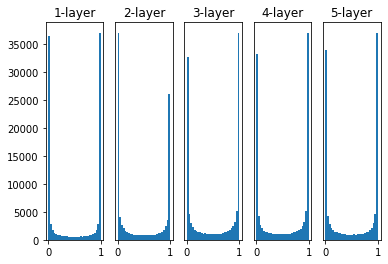

In [20]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

epoch:0, train acc:0.08333333333333333, test acc:0.0973
epoch:1, train acc:0.10666666666666667, test acc:0.1064
epoch:2, train acc:0.13, test acc:0.1172
epoch:3, train acc:0.14666666666666667, test acc:0.1261
epoch:4, train acc:0.16, test acc:0.1317
epoch:5, train acc:0.17333333333333334, test acc:0.1385
epoch:6, train acc:0.18, test acc:0.1509
epoch:7, train acc:0.2, test acc:0.1819
epoch:8, train acc:0.24333333333333335, test acc:0.199
epoch:9, train acc:0.26666666666666666, test acc:0.2061
epoch:10, train acc:0.3, test acc:0.2275
epoch:11, train acc:0.32666666666666666, test acc:0.243
epoch:12, train acc:0.38666666666666666, test acc:0.2763
epoch:13, train acc:0.4033333333333333, test acc:0.3035
epoch:14, train acc:0.43, test acc:0.3127
epoch:15, train acc:0.4633333333333333, test acc:0.3377
epoch:16, train acc:0.49666666666666665, test acc:0.3569
epoch:17, train acc:0.49333333333333335, test acc:0.3828
epoch:18, train acc:0.5133333333333333, test acc:0.3983
epoch:19, train acc:0.54

epoch:158, train acc:0.8933333333333333, test acc:0.7502
epoch:159, train acc:0.8966666666666666, test acc:0.7536
epoch:160, train acc:0.9033333333333333, test acc:0.7525
epoch:161, train acc:0.89, test acc:0.751
epoch:162, train acc:0.8866666666666667, test acc:0.7453
epoch:163, train acc:0.89, test acc:0.749
epoch:164, train acc:0.8933333333333333, test acc:0.747
epoch:165, train acc:0.8866666666666667, test acc:0.7478
epoch:166, train acc:0.8833333333333333, test acc:0.7466
epoch:167, train acc:0.8866666666666667, test acc:0.748
epoch:168, train acc:0.88, test acc:0.7435
epoch:169, train acc:0.8933333333333333, test acc:0.7497
epoch:170, train acc:0.9033333333333333, test acc:0.7492
epoch:171, train acc:0.9066666666666666, test acc:0.7535
epoch:172, train acc:0.9, test acc:0.7457
epoch:173, train acc:0.9033333333333333, test acc:0.7521
epoch:174, train acc:0.8966666666666666, test acc:0.7513
epoch:175, train acc:0.8933333333333333, test acc:0.7466
epoch:176, train acc:0.886666666666

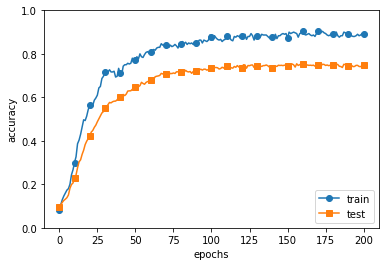

In [25]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from preferences.dataset.mnist import load_mnist
from preferences.common.multi_layer_net import MultiLayerNet
from preferences.common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()